In [1]:
# -*- coding: utf-8 -*-

# 📝 Exercise M4.04

In the previous notebook, we saw the effect of applying some regularization
on the coefficient of a linear model.

In this exercise, we will study the advantage of using some regularization
when dealing with correlated features.

We will first create a regression dataset. This dataset will contain 2,000
samples and 5 features from which only 2 features will be informative.

In [2]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000,
    n_features=5,
    n_informative=2,
    shuffle=False,
    coef=True,
    random_state=0,
    noise=30,
)

When creating the dataset, `make_regression` returns the true coefficient
used to generate the dataset. Let's plot this information.

Relevant feature #0     9.566665
Relevant feature #1    40.192077
Noisy feature #0        0.000000
Noisy feature #1        0.000000
Noisy feature #2        0.000000
dtype: float64

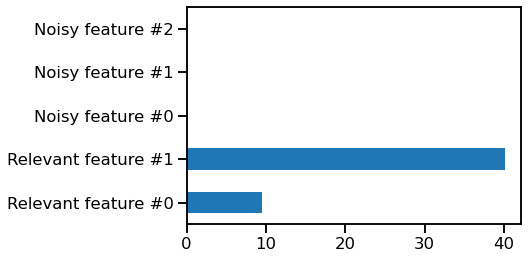

In [3]:
import pandas as pd

feature_names = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and
check the value of the coefficients. Are the coefficients of the linear
regressor close to the coefficients used to generate the dataset?

In [4]:
# Write your code here.
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(data, target)

model.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

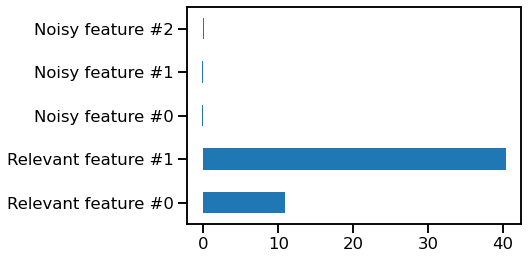

In [5]:
feature_names = [
    'Relevant feature #0',
    'Relevant feature #1',
    'Noisy feature #0',
    'Noisy feature #1',
    'Noisy feature #2'
]

coef = pd.Series(model.coef_, index=feature_names)
_ = coef.plot.barh()

Now, create a new dataset that will be the same as `data` with 4 additional
columns that will repeat twice features 0 and 1. This procedure will create
perfectly correlated features.

In [6]:
data

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       ...,
       [-0.77440295,  0.70878733,  0.0184736 , -0.10408058, -0.23485774],
       [-0.25090635, -0.96275025,  0.49340515,  2.13305005,  0.98388829],
       [-1.80928169,  0.04235881,  0.51687218, -0.03292069,  1.29811143]])

In [7]:
# Write your code here.
import numpy as np

new_data = np.concatenate([data, data[:, [0, 1]], data[:, [0, 1]]], axis=1)

new_data

array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.40015721,
         1.76405235,  0.40015721],
       [-0.97727788,  0.95008842, -0.15135721, ...,  0.95008842,
        -0.97727788,  0.95008842],
       [ 0.14404357,  1.45427351,  0.76103773, ...,  1.45427351,
         0.14404357,  1.45427351],
       ...,
       [-0.77440295,  0.70878733,  0.0184736 , ...,  0.70878733,
        -0.77440295,  0.70878733],
       [-0.25090635, -0.96275025,  0.49340515, ..., -0.96275025,
        -0.25090635, -0.96275025],
       [-1.80928169,  0.04235881,  0.51687218, ...,  0.04235881,
        -1.80928169,  0.04235881]])

Fit again the linear regressor on this new dataset and check the
coefficients. What do you observe?

In [8]:
# Write your code here.
model_rep = LinearRegression()
model_rep.fit(new_data, target)

model_rep.coef_

array([ 1.33594010e+12, -1.62497905e+14, -1.98242188e-01, -1.87133789e-01,
        9.57031250e-02, -6.67970049e+11,  4.20600332e+13, -6.67970049e+11,
        1.20437872e+14])

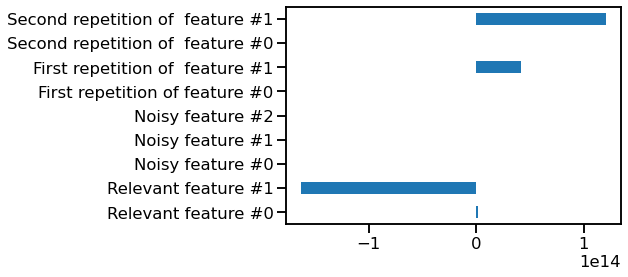

In [9]:
feature_names = [
    'Relevant feature #0',
    'Relevant feature #1',
    'Noisy feature #0',
    'Noisy feature #1',
    'Noisy feature #2',
    'First repetition of feature #0',
    'First repetition of  feature #1',
    'Second repetition of  feature #0',
    'Second repetition of  feature #1',
]

coef = pd.Series(model_rep.coef_, index=feature_names)
_ = coef.plot.barh()

Create a ridge regressor and fit on the same dataset. Check the coefficients.
What do you observe?

In [10]:
# Write your code here.
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(new_data, target)

ridge_model.coef_

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 , 13.46802113,  3.6313933 , 13.46802113])

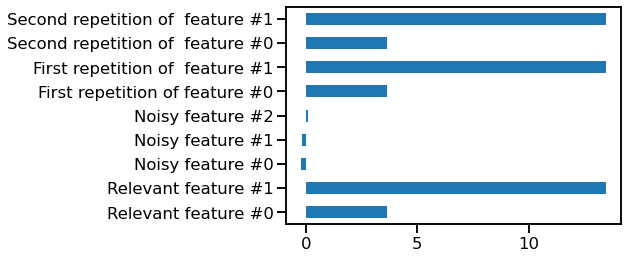

In [11]:
coef = pd.Series(ridge_model.coef_, index=feature_names)
_ = coef.plot.barh()

Can you find the relationship between the ridge coefficients and the original
coefficients?

In [12]:
# Write your code here.
ridge_model.coef_[:5]

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205])

In [13]:
model.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

In [14]:
ridge_model.coef_[:5] * 3

array([10.89417991, 40.40406338, -0.61648035, -0.56789883,  0.33351616])

### Extra: Dealing with correlation between one-hot encoded features

In this section, we will focus on how to deal with correlated features that arise naturally when one-hot encoding categorical features.

Let’s first load the Ames housing dataset and take a subset of features that are only categorical features.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values='?')
ames_housing = ames_housing.drop(columns="Id")

categorical_columns = ["Street", "Foundation", "CentralAir", "PavedDrive"]
target_name = "SalePrice"
X, y = ames_housing[categorical_columns], ames_housing[target_name]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

We previously presented that a OneHotEncoder creates as many columns as categories. Therefore, there is always one column (i.e. one encoded category) that can be inferred from the others. Thus, OneHotEncoder creates collinear features.

We illustrate this behaviour by considering the “CentralAir” feature that contains only two categories:

In [16]:
X_train["CentralAir"]

618     Y
870     N
92      Y
817     Y
302     Y
       ..
763     Y
835     Y
1216    Y
559     Y
684     Y
Name: CentralAir, Length: 1168, dtype: object

In [17]:
from sklearn.preprocessing import OneHotEncoder

single_feature = ["CentralAir"]
encoder = OneHotEncoder(sparse=False, dtype=np.int32)
X_trans = encoder.fit_transform(X_train[single_feature])
X_trans = pd.DataFrame(
    X_trans,
    columns=encoder.get_feature_names_out(input_features=single_feature),
)
X_trans

,CentralAir_N,CentralAir_Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
1163,0,1
1164,0,1
1165,0,1
1166,0,1


Here, we see that the encoded category “CentralAir_N” is the opposite of the encoded category “CentralAir_Y”. Therefore, we observe that using a OneHotEncoder creates two features having the problematic pattern observed earlier in this exercise. Training a linear regression model on such a of one-hot encoded binary feature can therefore lead to numerical problems, especially without regularization. Furthermore, the two one-hot features are redundant as they encode exactly the same information in opposite ways.

Using regularization helps to overcome the numerical issues that we highlighted earlier in this exercise.

Another strategy is to arbitrarily drop one of the encoded categories. Scikit-learn provides such an option by setting the parameter drop in the OneHotEncoder. This parameter can be set to first to always drop the first encoded category or binary_only to only drop a column in the case of binary categories.

In [18]:
encoder = OneHotEncoder(drop="first", sparse=False, dtype=np.int32)
X_trans = encoder.fit_transform(X_train[single_feature])
X_trans = pd.DataFrame(
    X_trans,
    columns=encoder.get_feature_names_out(input_features=single_feature),
)
X_trans

,CentralAir_Y
0,1
1,0
2,1
3,1
4,1
...,...
1163,1
1164,1
1165,1
1166,1


We see that only the second column of the previous encoded data is kept. Dropping one of the one-hot encoded column is a common practice, especially for binary categorical features. Note however that this breaks symmetry between categories and impacts the number of coefficients of the model, their values, and thus their meaning, especially when applying strong regularization.

Let’s finally illustrate how to use this option is a machine-learning pipeline:

In [19]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(OneHotEncoder(drop="first", dtype=np.int32), Ridge())
model.fit(X_train, y_train)
n_categories = [X_train[col].nunique() for col in X_train.columns]
print(
    f"R2 score on the testing set: {model.score(X_test, y_test):.2f}"
)
print(
    f"Our model contains {model[-1].coef_.size} features while "
    f"{sum(n_categories)} categories are originally available."
)

R2 score on the testing set: 0.24
Our model contains 9 features while 13 categories are originally available.
